In [419]:

import pandas as pd
import numpy as np
import ast
import gzip
import json
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re

# STEAM GAMES

### Primero cargo el dataframe

In [100]:
steam_games = pd.read_json('../datasets/steam_games.json.gz',compression='gzip',lines=True)

In [101]:
steam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120445 entries, 0 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     24083 non-null  object 
 1   genres        28852 non-null  object 
 2   app_name      32133 non-null  object 
 3   title         30085 non-null  object 
 4   url           32135 non-null  object 
 5   release_date  30068 non-null  object 
 6   tags          31972 non-null  object 
 7   reviews_url   32133 non-null  object 
 8   specs         31465 non-null  object 
 9   price         30758 non-null  object 
 10  early_access  32135 non-null  float64
 11  id            32133 non-null  float64
 12  developer     28836 non-null  object 
dtypes: float64(2), object(11)
memory usage: 11.9+ MB


In [102]:
steam_games.sample(10)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
1149,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
8154,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
6261,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
7331,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
37686,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
108805,Screeps,"[Indie, Massively Multiplayer, Strategy]",Screeps,Screeps,http://store.steampowered.com/app/464350/Screeps/,2016-11-16,"[Programming, Strategy, Massively Multiplayer,...",http://steamcommunity.com/app/464350/reviews/?...,"[Single-player, Online Multi-Player, MMO, Stea...",14.99,0.0,464350.0,Screeps
81149,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
118409,Cellar Door Games,"[Action, Indie, RPG]",Rogue Legacy,Rogue Legacy,http://store.steampowered.com/app/241600/Rogue...,2013-06-27,"[Rogue-like, Platformer, Indie, Action, Single...",http://steamcommunity.com/app/241600/reviews/?...,"[Single-player, Steam Achievements, Full contr...",14.99,0.0,241600.0,Cellar Door Games
119364,Wadjet Eye Games,"[Adventure, Indie]",The Blackwell Legacy,The Blackwell Legacy,http://store.steampowered.com/app/80330/The_Bl...,2012-01-13,"[Adventure, Point & Click, Indie, Female Prota...",http://steamcommunity.com/app/80330/reviews/?b...,"[Single-player, Steam Achievements, Steam Trad...",4.99,0.0,80330.0,Wadjet Eye Games
41140,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None


### Elimino las filas completamente nulas

In [103]:

steam_games.dropna(how='all',inplace=True)

### Busco id nulos

In [104]:

steam_games[steam_games['id'].isnull()]

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88384,None,None,None,None,http://store.steampowered.com/,None,None,None,None,19.99,0.0,NaN,None
119271,"Warner Bros. Interactive Entertainment, Feral ...","[Action, Adventure]",Batman: Arkham City - Game of the Year Edition,Batman: Arkham City - Game of the Year Edition,http://store.steampowered.com/app/200260,2012-09-07,"[Action, Open World, Batman, Adventure, Stealt...",None,"[Single-player, Steam Achievements, Steam Trad...",19.99,0.0,NaN,"Rocksteady Studios,Feral Interactive (Mac)"


### Se encontraron dos filas con id nulo, una solo posee valores de url y precio, ademas el url es de la store de steam por lo tanto se eliminara.
### La otra fila con id nulo estaba replicada de otra fila, ya que tiene los mismos valores, por esto tambien se eliminara

In [105]:
steam_games[steam_games['title'] == 'Batman: Arkham City - Game of the Year Edition'] 

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
89378,"Warner Bros. Interactive Entertainment, Feral ...","[Action, Adventure]",Batman: Arkham City - Game of the Year Edition,Batman: Arkham City - Game of the Year Edition,http://store.steampowered.com/app/200260/Batma...,2012-09-07,"[Action, Open World, Batman, Adventure, Stealt...",http://steamcommunity.com/app/200260/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",19.99,0.0,200260.0,"Rocksteady Studios,Feral Interactive (Mac)"
119271,"Warner Bros. Interactive Entertainment, Feral ...","[Action, Adventure]",Batman: Arkham City - Game of the Year Edition,Batman: Arkham City - Game of the Year Edition,http://store.steampowered.com/app/200260,2012-09-07,"[Action, Open World, Batman, Adventure, Stealt...",None,"[Single-player, Steam Achievements, Steam Trad...",19.99,0.0,NaN,"Rocksteady Studios,Feral Interactive (Mac)"


In [106]:
steam_games.dropna(subset=['id'],inplace=True) # Elimino las 2 filas con id nulo

### Busco los duplicados en id

In [107]:
duplicados = steam_games['id'].value_counts() > 1
steam_games[steam_games['id'].isin(duplicados[duplicados].index)]

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
102204,Bethesda Softworks,[Action],Wolfenstein II: The New Colossus,Wolfenstein II: The New Colossus,http://store.steampowered.com/app/612880/,2017-10-26,"[Action, FPS, Gore, Violent, Alternate History...",http://steamcommunity.com/app/612880/reviews/?...,"[Single-player, Steam Achievements, Full contr...",59.99,0.0,612880.0,Machine Games
102883,Bethesda Softworks,[Action],Wolfenstein II: The New Colossus,Wolfenstein II: The New Colossus,http://store.steampowered.com/app/612880/Wolfe...,2017-10-26,"[Action, FPS, Gore, Violent, Alternate History...",http://steamcommunity.com/app/612880/reviews/?...,"[Single-player, Steam Achievements, Full contr...",59.99,0.0,612880.0,Machine Games


### Se encontraron dos filas completamente duplicadas se eliminara una

In [108]:
steam_games.drop_duplicates(subset='id',inplace=True,keep='first')

### Convierto el id a tipo entero

In [109]:
steam_games['id'] = steam_games['id'].astype('int') # Paso el id a entero

In [110]:
steam_games.isnull().sum() # Cuanto la cantidad de nulos

publisher       8051
genres          3282
app_name           1
title           2049
url                0
release_date    2066
tags             162
reviews_url        0
specs            669
price           1377
early_access       0
id                 0
developer       3298
dtype: int64

In [111]:
steam_games[steam_games['app_name'].isnull()]

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
90890,None,"[Action, Indie]",None,None,http://store.steampowered.com/app/317160/_/,2014-08-26,"[Action, Indie]",http://steamcommunity.com/app/317160/reviews/?...,"[Single-player, Game demo]",None,0.0,317160,None


### El unico juego que posee nulo en app_name y title, no pose ni desarrolador ni publicador, por esto se eliminara.

In [112]:
# El unico juego que no tiene ni titulo ni app_name tampoco tiene desarrollador o publicador, solo pose genero tag y un url que lleva a ningun juego, por esto se eliminara esta fila
steam_games.dropna(subset='app_name',inplace=True)

### Se remplazara los nulos de developer por los de publisher

In [113]:
steam_games['developer'].fillna(steam_games['publisher'],inplace=True)

### Se eliminaran las columnas que no seran usadas por el estudio.
* publisher
* title
* url
* discount_price
* reviews_url
* early_access
* specs


In [114]:
steam_proc = steam_games.drop(columns=['publisher','title','url','reviews_url','early_access','specs'])

### Veo que tags y genres son columnas con datos similares, por esto buscare los nulos en genres y en tags

In [115]:
steam_proc[steam_proc['genres'].isna()]

,genres,app_name,release_date,tags,price,id,developer
88314,None,Log Challenge,None,"[Action, Indie, Casual, Sports]",2.99,773570,None
88321,None,Icarus Six Sixty Six,None,[Casual],Free,724910,None
88329,None,After Life VR,None,"[Early Access, Indie, VR]",4.99,772590,None
88330,None,Kitty Hawk,None,"[Early Access, Action, Adventure, Indie, Casual]",2.99,640250,None
88332,None,Mortars VR,None,"[Early Access, Strategy, Action, Indie, Casual...",0.99,711440,None
...,...,...,...,...,...,...,...
120428,None,Robotpencil Presents: Exercise: Brushwork,2018-01-03,"[Design & Illustration, Tutorial]",3.99,775640,None
120429,None,Robotpencil Presents: Creative Composition,2018-01-03,"[Design & Illustration, Tutorial]",3.99,777930,None
120430,None,The Gamble House,2016-11-19,[Movie],4.99,775370,None
120431,None,Kalen Chock Presents: 2017 Free Tutorial,2018-01-03,"[Design & Illustration, Tutorial]",Free,777950,None


In [116]:
steam_proc[steam_proc['tags'].isna()]['genres']

88589             [Adventure]
88608     [Action, Adventure]
88619                [Casual]
88620                [Casual]
88668                    None
                 ...         
119935               [Casual]
119937           [Simulation]
119949                   None
119962                [Indie]
120118               [Casual]
Name: genres, Length: 162, dtype: object

### Ahora voy a eliminar los valores que no esten en alguna fila  de genres de la columna tag para tener solo los generos
### Luego voy a agregar valores de tag que no esten en genres 
### Luego voy a remplazar los nulos de genres con los valores de tags
### Por ultimo voy a eliminar la columna tags que ya no aporta informacion

In [117]:


# Creando un conjunto de géneros únicos a partir de los datos de géneros no nulos en 'steam_proc'
genres = set(item for val in steam_proc['genres'].dropna() for item in val)

# Filtrando las etiquetas 'tags' para mantener solo aquellas que están presentes en 'genres'
steam_proc['tags'] = steam_proc['tags'].apply(lambda x: [item for item in x if item in genres] if isinstance(x, list) else x) 

# Rellenando valores nulos en la columna 'genres' con valores correspondientes de 'tags'
steam_proc['genres'].fillna(steam_proc['tags'], inplace=True)

def agregar_genres_tags(fila): # Función que añade valores de 'tags' a 'genres' que no estén ya presentes en 'genres'
    genres = fila['genres']
    tags = fila['tags']
    if isinstance(tags,list) and isinstance(genres,list):
        for tag in tags:
            if tag not in genres:
                genres.append(tag)
    return genres

# Aplicando la función 'agregar_genres_tags' a todos los elementos en el dataframe
steam_proc['genres'] = steam_proc.apply(lambda fila: agregar_genres_tags(fila), axis=1)

# Descartar la columna 'tags' ya que su información ya ha sido absorbida por 'genres'
steam_proc.drop(columns=['tags'], inplace=True)



### Genero dummies para la columna genres,  y luego eliminare esta ultima

In [118]:

# Ahora voy a generar dummies para genres 
steam_proc['genres'] =  steam_proc['genres'].apply(lambda x:".".join(x) if isinstance(x, list) else x)
dummies = steam_proc['genres'].str.get_dummies(sep='.')
#dummies = dummies.groupby(dummies.columns, axis=1).sum()
steam_proc = pd.concat([steam_proc,dummies],axis=1)

# Elimino la columna genres
steam_proc.drop(columns='genres',inplace=True)


### Columna Price:
* Primero voy a poner en valor 0 los que tengan un str con Free

In [119]:

steam_proc.loc[steam_proc['price'].str.contains("Free", na=False), 'price'] = 0.0

* Reviso los valores de price y Free to Play


In [120]:
steam_proc.loc[steam_proc['price'].apply(lambda x: isinstance(x, str)), ['price','Free to Play']]

,price,Free to Play
90715,Install Now,1
91181,Play WARMACHINE: Tactics Demo,0
92142,Install Theme,0
92228,Third-party,0
92336,Play Now,0
111044,Play the Demo,0
113310,Starting at $499.00,0
113311,Starting at $449.00,0
114527,Play Now,0
120148,Third-party,1


* Remplazo los  valores que tenian un string y un precio por el precio asociado

In [121]:
# A los dos valores que incluye el precio como parte de un string lo remplazo con su valor de precio
steam_proc['price'].replace('Starting at $499.00',499.0,inplace=True)
steam_proc['price'].replace('Starting at $449.00',499.0,inplace=True)

* Cuando precio posee un string y Free to Play vale 1 remplazo por 0

In [122]:

steam_proc.loc[(steam_proc['Free to Play'] == 1) & steam_proc['price'].apply(lambda x: isinstance(x, str)), ['price']] = 0.0


* Veo los valores nulos de price donde Free to Play vale 1

In [123]:
steam_proc[pd.isna(steam_proc['price'])][['Free to Play']].value_counts()

Free to Play
0               1171
1                205
Name: count, dtype: int64

* A esos valores los remplazo por 1

In [124]:
steam_proc.loc[(steam_proc['Free to Play'] == 1) & (pd.isna(steam_proc['price'])), 'price'] = 0.0

* Veo la cantidad de nulos que quedaron en price respecto al total,y veo que no llega al 4% de nulos

In [125]:
steam_proc[steam_proc['price'].isnull()].shape[0]/steam_proc.shape[0]

0.03644455510254894

* Elimino el resto de nulos en price, al no poder realizarse mas un analisis , ya que no considero correcto remlplazar un precio por un premedio u otro valor

In [126]:
# Elimino los valores de precio donde sean nulos o donde o donde no sean de tipo string
steam_proc = steam_proc[steam_proc['price'].apply(lambda x: isinstance(x, float))]
steam_proc.dropna(subset='price',inplace=True)


* Tenindo normalizada esta columna la convierto a flaot

In [127]:
# Teniendo precio con formato numerico convierto la columna a float
steam_proc['price'] = steam_proc['price'].astype('float')

### Veo los nulos que aun quedaron

In [128]:
steam_proc.isnull().sum()

app_name                        0
release_date                 1952
price                           0
id                              0
developer                    3115
Accounting                      0
Action                          0
Adventure                       0
Animation &amp; Modeling        0
Audio Production                0
Casual                          0
Design &amp; Illustration       0
Early Access                    0
Education                       0
Free to Play                    0
Indie                           0
Massively Multiplayer           0
Photo Editing                   0
RPG                             0
Racing                          0
Simulation                      0
Software Training               0
Sports                          0
Strategy                        0
Utilities                       0
Video Production                0
Web Publishing                  0
dtype: int64

In [129]:
print(f'Porcentaje de nulos : {1 - steam_proc.dropna(subset=["developer","release_date"]).shape[0] / steam_proc.shape[0]}')

Porcentaje de nulos : 0.10079472766039932


### Quedaron valores nulos en release_date, developer y specs que equivalen aproximadamente al 11% del dataframe. 
### Y al no poder hacer otro tratado se eliminaran

In [130]:
# Voy a liminar el resto de valores nulos
steam_proc.dropna(subset=['developer','release_date'],inplace=True)
steam_proc.isnull().sum()

app_name                     0
release_date                 0
price                        0
id                           0
developer                    0
Accounting                   0
Action                       0
Adventure                    0
Animation &amp; Modeling     0
Audio Production             0
Casual                       0
Design &amp; Illustration    0
Early Access                 0
Education                    0
Free to Play                 0
Indie                        0
Massively Multiplayer        0
Photo Editing                0
RPG                          0
Racing                       0
Simulation                   0
Software Training            0
Sports                       0
Strategy                     0
Utilities                    0
Video Production             0
Web Publishing               0
dtype: int64

### Convierto la columna release_date en datetime y genero la columna año

In [131]:
steam_proc['release_date'].value_counts()

release_date
2012-10-16    100
2017-08-31     90
2017-09-26     88
2017-07-25     78
2017-12-19     74
             ... 
2000-01-31      1
1994-08-15      1
1987-10-05      1
2021-12-31      1
2004-03-01      1
Name: count, Length: 3293, dtype: int64

### Verifico el formato de los año usando re

In [447]:

# Función para verificar el formato 'YYYY-MM-DD'
def is_valid_date_format(date_str):
    regex = r'^\d{4}-\d{2}-\d{2}$'
    return re.match(regex, date_str) is not None

# Crear una máscara booleana para las fechas que no tienen el formato 'YYYY-MM-DD'
invalid_date_mask = ~steam_proc['release_date'].astype(str).apply(is_valid_date_format)

# Filtrar las filas con fechas que no tienen el formato 'YYYY-MM-DD'
invalid_dates = steam_proc[invalid_date_mask]

# Mostrar las filas con fechas que no tienen el formato 'YYYY-MM-DD'
print(steam_proc[invalid_date_mask]['release_date'])

88354                        Beta测试已开启
88560                         Jun 2009
88816                         Oct 2010
88819                         Oct 2010
88820                         Oct 2010
88909                         Feb 2011
90917                         Sep 2014
91812                         Apr 2015
91814                         Apr 2015
94022                             2017
94314                         Apr 2016
94954                         Jul 2016
95444                      Coming Soon
98585                             soon
98873                         Jul 2017
99075                      Summer 2017
101168                            2018
101344                            SOON
101905                     Coming soon
101992               Demo coming soon.
102638                    January 2019
103983                            2018
104571                Release Date TBA
104701                            2017
104953                        Jul 2017
105517     Early Access S

### Hago una funcion para tratar los valores que no tienen el formato YYYY-MM-DD

In [455]:
def arreglar_errores(fecha: str):
    try:
        # Intenta convertir la fecha directamente a entero
        return int(fecha)
    except ValueError:
        try:
            # Intenta dividir la fecha usando un espacio en blanco como delimitador y convierte la segunda parte a entero
            return int(fecha.split(" ")[1])
        except (IndexError, ValueError):
            try:
                # Intenta dividir la fecha usando "." como delimitador y convierte la tercera parte a entero
                return int(fecha.split(".")[2])
            except (IndexError, ValueError):
                try:
                    # Intenta dividir la fecha usando un espacio en blanco como delimitador y convierte la quinta parte a entero
                    return int(fecha.split(" ")[4])
                except (IndexError, ValueError):
                    # Si no se puede convertir, devuelve None
                    return None

                    
            
        

In [456]:
steam_proc.loc[invalid_date_mask, 'Year'] = steam_proc.loc[invalid_date_mask, 'release_date'].apply(arreglar_errores)

# Convertir las fechas válidas a datetime y extraer el año
valid_date_mask = ~invalid_date_mask
steam_proc.loc[valid_date_mask, 'Year'] = pd.to_datetime(steam_proc.loc[valid_date_mask, 'release_date'], errors='coerce').dt.year


In [461]:
steam_proc['Year'] = steam_proc['Year'].astype(float)

In [98]:
print(steam_proc.info())

<class 'pandas.core.frame.DataFrame'>
Index: 27834 entries, 88310 to 120443
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   app_name                   27834 non-null  object        
 1   release_date               27774 non-null  datetime64[ns]
 2   price                      27834 non-null  float64       
 3   id                         27834 non-null  int64         
 4   developer                  27834 non-null  object        
 5   Accounting                 27834 non-null  int64         
 6   Action                     27834 non-null  int64         
 7   Adventure                  27834 non-null  int64         
 8   Animation &amp; Modeling   27834 non-null  int64         
 9   Audio Production           27834 non-null  int64         
 10  Casual                     27834 non-null  int64         
 11  Design &amp; Illustration  27834 non-null  int64         
 12  Earl

* Ahora la release_date no la usare por esto la eliminare

In [462]:
steam_proc.drop(columns=['release_date'],inplace=True)


In [465]:
steam_proc['Year'].isnull().sum()
steam_proc['Year'].dropna(inplace=True)


### Por ultimo exporto como csv el proceso de ETL

In [466]:
steam_proc.to_csv('./datasets/steam_games.csv',index=False)

# USERS REVIEWS

### Ahora voy a trabajar con el archivo user_reviews.json.gz, el cual guarda registros de los comentarios de los usuarios sobre distintos items


###  Primero realizo la carga

In [37]:
user_reviews_gz = "../datasets/user_reviews.json.gz"
filas=[]
with gzip.open(user_reviews_gz, 'rt', encoding='MacRoman') as archivo:
    for line in archivo.readlines():
        filas.append(ast.literal_eval(line))

user_review = pd.DataFrame(filas)

In [38]:
user_review

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."
...,...,...,...
25794,76561198306599751,http://steamcommunity.com/profiles/76561198306...,"[{'funny': '', 'posted': 'Posted May 31.', 'la..."
25795,Ghoustik,http://steamcommunity.com/id/Ghoustik,"[{'funny': '', 'posted': 'Posted June 17.', 'l..."
25796,76561198310819422,http://steamcommunity.com/profiles/76561198310...,"[{'funny': '1 person found this review funny',..."
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"[{'funny': '', 'posted': 'Posted July 21.', 'l..."


### Ahora veo que la columna reviews es una lista de diccionarios, donde cada item de la lista equivale a un producto distinto que ese usuario haya comendado, y cada cada diccionario guarda variables referentes al item y su posteo.
### Por esto primero voy a usar explode para duplicar las filas por cada item de la lista, y luego voy a generar un dataframe con el diccionario nuevo y lo concatenare a traves de las columnas con el el dataframe con filas duplicadas

In [39]:
user_review_explode = user_review.explode('reviews') # Duplico las filas generando un diccionario por cada dicc#ionario en la lista
# Ahora concateno el dataframe original, con el dataframe generado a partir de transformar los diccionarios a pandas
user_review_explode = pd.concat([user_review_explode.drop(['reviews'],axis=1),user_review_explode['reviews'].apply(pd.Series)],axis=1)  

### Elimino columnas que no seran usadas para el estudio
* user_url
* funny
* last_edited
* helpful
* 0

In [40]:
user_review_explode.drop(columns=['user_url','funny','helpful','last_edited',0],inplace=True)

In [41]:
user_review_explode

,user_id,posted,item_id,recommend,review
0,76561197970982479,"Posted November 5, 2011.",1250,True,Simple yet with great replayability. In my opi...
0,76561197970982479,"Posted July 15, 2011.",22200,True,It's unique and worth a playthrough.
0,76561197970982479,"Posted April 21, 2011.",43110,True,Great atmosphere. The gunplay can be a bit chu...
1,js41637,"Posted June 24, 2014.",251610,True,I know what you think when you see this title ...
1,js41637,"Posted September 8, 2013.",227300,True,For a simple (it's actually not all that simpl...
...,...,...,...,...,...
25797,76561198312638244,Posted July 10.,70,True,a must have classic from steam definitely wort...
25797,76561198312638244,Posted July 8.,362890,True,this game is a perfect remake of the original ...
25798,LydiaMorley,Posted July 3.,273110,True,had so much fun plaing this and collecting res...
25798,LydiaMorley,Posted July 20.,730,True,:D


### Ahora a partir de la columna reveiw se hara un analisis de sentimiento, generando una nueva columna.
### Este se llamara "sentiment_analysis"  y tendra 2 para sentimiento positivo 0 para negativo y 1 para neutral
### Habiendo hecho esto elimino la columna review

In [42]:
#Hago el analisis de sentimiento en la columna review
nltk.download('vader_lexicon')
model_sentimiento = SentimentIntensityAnalyzer()


def analizador(review):
    # Obtener el puntaje de sentimiento usando SentimentIntensityAnalyzer
    sentimiento_score = model_sentimiento.polarity_scores(review)
    
    # Clasifico el sentimiento
    
    if review and not pd.isnull(review):
        if sentimiento_score['compound'] >= 0.05:
            return 2  # Sentimiento positivo
        elif sentimiento_score['compound'] <= -0.05:
            return 0  # Sentimiento negativo
        else:
            return 1  # Sentimiento neutral
    else:
        return 1

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ubuntu/nltk_data...


* Para aplicar la funcion los nulos tienen que ser vacio

In [43]:
user_review_explode['review'].fillna('',inplace=True) # Remplazo los nulos con un string vacio

In [44]:
user_review_explode['sentiment_analysis']  = user_review_explode['review'].apply(analizador)
user_review_explode.drop(columns='review',inplace=True) # Aplica la funcion que determina el sentimiento

* Grafico las el analisis por sentimiento de las reviews

<Axes: xlabel='sentiment_analysis', ylabel='Count'>

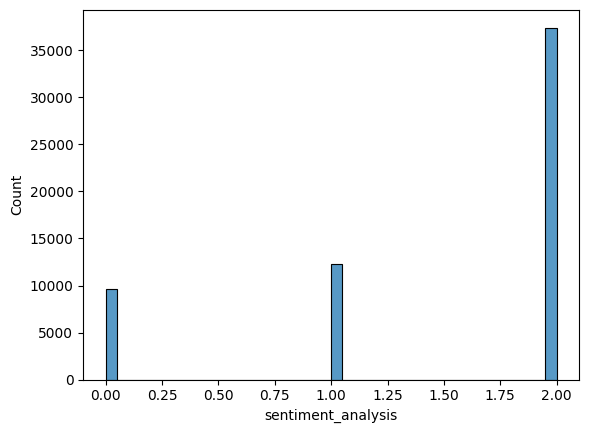

In [45]:
sns.histplot(data=user_review_explode,x='sentiment_analysis')

### Se buscan los nulos que quedaron

In [46]:
user_review_explode.isnull().sum()

user_id                0
posted                28
item_id               28
recommend             28
sentiment_analysis     0
dtype: int64

In [47]:
user_review_explode[user_review_explode.isnull().any(axis=1)]

,user_id,posted,item_id,recommend,sentiment_analysis
62,gdxsd,NaN,NaN,NaN,1
83,76561198094224872,NaN,NaN,NaN,1
1047,76561198021575394,NaN,NaN,NaN,1
3954,cmuir37,NaN,NaN,NaN,1
5394,Jaysteeny,NaN,NaN,NaN,1
6135,ML8989,NaN,NaN,NaN,1
7583,76561198079215291,NaN,NaN,NaN,1
7952,76561198079342142,NaN,NaN,NaN,1
9894,76561198061996985,NaN,NaN,NaN,1
10381,76561198108286351,NaN,NaN,NaN,1


### Hay nulos pero coiciden con todas las columnas de reviews por esto se eliminaran

In [48]:

user_review_explode.dropna(inplace=True)


In [49]:
user_review_explode

,user_id,posted,item_id,recommend,sentiment_analysis
0,76561197970982479,"Posted November 5, 2011.",1250,True,2
0,76561197970982479,"Posted July 15, 2011.",22200,True,2
0,76561197970982479,"Posted April 21, 2011.",43110,True,2
1,js41637,"Posted June 24, 2014.",251610,True,2
1,js41637,"Posted September 8, 2013.",227300,True,2
...,...,...,...,...,...
25797,76561198312638244,Posted July 10.,70,True,2
25797,76561198312638244,Posted July 8.,362890,True,2
25798,LydiaMorley,Posted July 3.,273110,True,2
25798,LydiaMorley,Posted July 20.,730,True,2


### Por ultimo se exporta como csv

In [ ]:
user_review_explode.to_csv('./datasets/user_reviews.csv',index=False)

# Users Item

### Funcion para poder descomprimir el dataset de items

In [ ]:
def descompimir_json(ruta, variable_anidada):
    '''Función que recibe una ruta de acceso a un archivo json anidado y carga la información en un
    DataFrame de Pandas'''
    fila = []
    with gzip.open(ruta, 'rt', encoding='MacRoman') as archivo:
      for line in archivo.readlines():
          fila.append(ast.literal_eval(line))

    df = pd.DataFrame(fila)                                                 
    df = df.explode(variable_anidada).reset_index()                         
    df = df.drop(columns="index")                                           
    df = pd.concat([df, pd.json_normalize(df[variable_anidada])], axis=1)   
    df = df.drop(columns=variable_anidada)                                  

    return df

In [ ]:
user_items = descompimir_json("../datasets/users_items.json.gz",'items')

In [38]:
user_items.describe()

,items_count,steam_id,item_id,playtime_forever,playtime_2weeks
count,5.153209e+06,5.153209e+06,5.153209e+06,5.153209e+06,5.153209e+06
mean,3.147229e+02,7.656120e+16,1.784481e+05,9.914951e+02,9.104707e+00
std,6.933596e+02,3.916645e+07,1.318598e+05,5.418204e+03,1.403926e+02
min,1.000000e+00,7.656120e+16,1.000000e+01,0.000000e+00,0.000000e+00
25%,7.200000e+01,7.656120e+16,3.446000e+04,0.000000e+00,0.000000e+00
50%,1.380000e+02,7.656120e+16,2.144200e+05,3.400000e+01,0.000000e+00
75%,2.760000e+02,7.656120e+16,2.664300e+05,3.550000e+02,0.000000e+00
max,7.762000e+03,7.656120e+16,5.307200e+05,6.427730e+05,1.996700e+04


In [ ]:
user_items.isnull().sum()

In [ ]:
user_items[user_items['item_id'].isna()]

## Todos los nulos hacen referencia a las mismas filas por esto seran eliminados

In [ ]:
user_items.dropna(inplace=True)

### Por ultimo elimino las columnas que no usare

In [ ]:
user_items.drop(columns=['user_url','playtime_2weeks','steam_id'])

<Axes: ylabel='playtime_forever'>

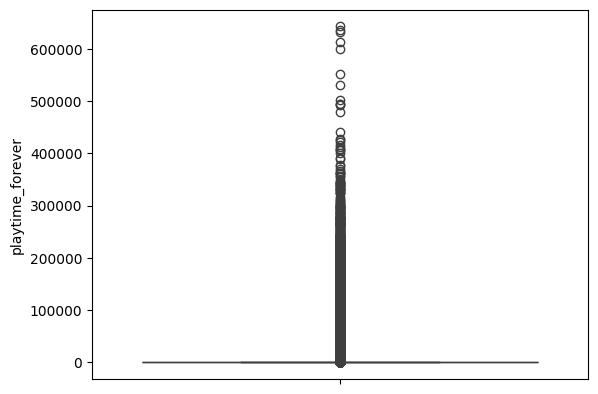

In [37]:
sns.boxplot(data=user_items,y='playtime_forever') # Hago un diagrama de caja para ver outliers

### Tiene muchos outliers, pero si se consideran minutos no tienen que ser necesariamente errores

### Exporto el dataframe a csv y lo comprimo en gz


In [ ]:
user_items.to_csv('./datasets/users_item_proc.csv',index=False)

In [ ]:
with gzip.open('user_items_proc.csv.gz', 'wb') as f:
    user_items.to_csv(f, index=False, encoding='utf-8')